In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
base_path = '/content/Tingkat Penghunian Kamar pada Hotel Bintang '
years = [2018, 2019, 2020, 2021]
dfs = [pd.read_excel(f'{base_path}{i}.xlsx', skiprows=2) for i in years]

In [24]:
for i in dfs:
  i.dropna(inplace=True)
  i.drop('Tahunan', inplace=True, axis=1)

In [25]:
columns = dfs[0].columns.to_list()
columns[0] = 'Wilayah'
for i in dfs:
  i.columns = columns

In [26]:
dfs[0]

,Wilayah,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
0,ACEH,31.64,38.88,38.27,52.88,44.94,30.83,47.17,53.35,60.18,50.66,48.17,43.38
1,SUMATERA UTARA,46.57,39.93,46.49,45.37,43.29,44.29,45.34,35.07,43.40,38.84,50.54,43.96
2,SUMATERA BARAT,47.34,53.51,53.47,60.30,49.96,48.57,58.09,59.45,56.81,65.06,65.35,58.59
3,RIAU,45.41,48.17,47.08,52.91,42.56,40.16,45.91,44.98,48.62,48.35,51.23,52.16
4,JAMBI,38.33,44.12,43.94,52.00,44.68,35.75,42.18,38.93,41.72,45.88,61.15,46.60
5,SUMATERA SELATAN,55.64,63.34,65.85,63.32,58.85,55.65,58.53,62.35,56.31,58.12,57.81,55.79
6,BENGKULU,57.98,56.29,62.01,66.30,64.39,53.88,65.08,64.36,78.42,77.02,77.32,72.05
7,LAMPUNG,48.07,50.27,60.54,58.64,49.45,53.67,58.27,65.22,50.46,67.32,70.13,69.45
8,KEP. BANGKA BELITUNG,32.43,35.65,43.58,45.95,35.50,36.96,38.25,45.27,43.75,39.59,44.43,37.76
9,KEP. RIAU,48.99,58.78,55.61,53.50,46.98,48.30,46.09,48.62,56.63,57.59,58.30,65.63


In [27]:
dfs[0].T.reset_index()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,Wilayah,ACEH,SUMATERA UTARA,SUMATERA BARAT,RIAU,JAMBI,SUMATERA SELATAN,BENGKULU,LAMPUNG,KEP. BANGKA BELITUNG,KEP. RIAU,DKI JAKARTA,JAWA BARAT,JAWA TENGAH,DI YOGYAKARTA,JAWA TIMUR,BANTEN,BALI,NUSA TENGGARA BARAT,NUSA TENGGARA TIMUR,KALIMANTAN BARAT,KALIMANTAN TENGAH,KALIMANTAN SELATAN,KALIMANTAN TIMUR,KALIMANTAN UTARA,SULAWESI UTARA,SULAWESI TENGAH,SULAWESI SELATAN,SULAWESI TENGGARA,GORONTALO,SULAWESI BARAT,MALUKU,MALUKU UTARA,PAPUA BARAT,PAPUA,INDONESIA
1,Januari,31.64,46.57,47.34,45.41,38.33,55.64,57.98,48.07,32.43,48.99,64.74,53.04,44.85,52.94,51.41,51.49,52.97,37.91,39.51,38.32,50.87,43.66,48.28,31.75,60.24,44.57,50.96,37.02,34.94,36.86,26.75,38.4,46.96,46.49,51.91
2,Februari,38.88,39.93,53.51,48.17,44.12,63.34,56.29,50.27,35.65,58.78,62.43,57.98,44.28,54.09,51.9,58.68,66.66,40.6,58.94,48.92,54.84,55.43,52.59,32.18,69.47,44.25,47.47,38.32,49.87,40.94,41.73,46.07,54.37,53.18,56.21
3,Maret,38.27,46.49,53.47,47.08,43.94,65.85,62.01,60.54,43.58,55.61,61.77,61.21,43.39,53.96,59.51,62.4,61.19,51.32,60.92,58.29,60.72,66.17,52.48,42.73,65.8,47.4,49.29,48.4,47.57,37.74,38.55,54.3,60.97,53.92,57.1
4,April,52.88,45.37,60.3,52.91,52,63.32,66.3,58.64,45.95,53.5,62.91,56.18,46.9,60.42,56.43,54.84,63.53,52.49,62.64,58.08,63.96,60.08,54.14,47.94,67.94,56.23,52.1,53.62,56.69,41.55,44.07,58.15,58.4,57.44,57.43
5,Mei,44.94,43.29,49.96,42.56,44.68,58.85,64.39,49.45,35.5,46.98,65.61,48.38,41.81,50.38,50.08,47.02,67.55,54.06,63.47,52.76,57.18,52.2,46.8,38.63,65.19,49.51,49.18,50.16,42.55,47.4,41.1,34.1,55.42,48.86,53.86
6,Juni,30.83,44.29,48.57,40.16,35.75,55.65,53.88,53.67,36.96,48.3,52.48,51.04,46.16,50.06,50.57,45.09,70.32,46.56,47.21,43.31,51.15,41.96,43.13,36.43,68.79,30.07,44.06,32.28,39.93,48.25,24.52,32.43,39.48,45.96,52.04
7,Juli,47.17,45.34,58.09,45.91,42.18,58.53,65.08,58.27,38.25,46.09,78.79,57.78,47.44,60.08,58.88,55.14,74.4,60.44,63.26,58.65,58.81,58.4,54.8,48.29,67.37,50.63,54.42,46.34,48.25,37.58,40.37,42.3,57.23,55.15,59.3
8,Agustus,53.35,35.07,59.45,44.98,38.93,62.35,64.36,65.22,45.27,48.62,74.12,55.97,45.31,57.06,57.67,58.16,73.83,28.18,58.92,54.45,62.03,62.98,51.1,40.69,70.92,54.44,51.96,41.25,57.01,51.28,35.73,46,58.15,49.32,60.01
9,September,60.18,43.4,56.81,48.62,41.72,56.31,78.42,50.46,43.75,56.63,68.33,61.53,44.46,59.01,58.43,53.41,69.52,34.85,62.21,59.57,57.6,58.05,51.84,45.41,66.68,45.41,50.09,45.69,51.46,41.57,33.4,41.41,54.24,43.91,58.95


In [46]:
def invert_df(df, year = None):
  new_df = df.T.reset_index()
  new_index = new_df.iloc[0]
  new_index['index'] = 'Month'
  new_df = new_df.iloc[1:]
  new_df.columns = new_index
  new_df['Month'] = new_df.index
  if year is not None:
    new_df['year'] = year
  return new_df

In [47]:
inverted_dfs = [invert_df(i[0], i[1]) for i in zip(dfs, years)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [49]:
for i in inverted_dfs:
  print(i.head(5))

0  Month   ACEH SUMATERA UTARA  ...  PAPUA INDONESIA  year
1      1  31.64          46.57  ...  46.49     51.91  2018
2      2  38.88          39.93  ...  53.18     56.21  2018
3      3  38.27          46.49  ...  53.92      57.1  2018
4      4  52.88          45.37  ...  57.44     57.43  2018
5      5  44.94          43.29  ...  48.86     53.86  2018

[5 rows x 37 columns]
0  Month   ACEH SUMATERA UTARA  ...  PAPUA INDONESIA  year
1      1  31.36          42.85  ...  36.09     51.47  2019
2      2  41.46          45.31  ...  40.14     52.44  2019
3      3  40.95          54.44  ...  59.08     52.88  2019
4      4  40.13          49.83  ...  52.46      53.9  2019
5      5  30.01          40.45  ...  45.99     43.53  2019

[5 rows x 37 columns]
0  Month   ACEH SUMATERA UTARA  ...  PAPUA INDONESIA  year
1      1  35.36          48.06  ...  41.14     49.17  2020
2      2  39.33          45.24  ...  51.43     49.22  2020
3      3  33.57           29.2  ...  32.88     32.24  2020
4      4  

In [53]:
inverted_dfs[3] = inverted_dfs[3].replace({'-':pd.NA}).dropna()

In [56]:
combined_df = pd.concat(inverted_dfs).sort_values(['year', 'Month'])

In [75]:
combined_df['date'] = combined_df['Month'].astype(str) + '-' + combined_df['year'].astype(str)
combined_df

,Month,ACEH,SUMATERA UTARA,SUMATERA BARAT,RIAU,JAMBI,SUMATERA SELATAN,BENGKULU,LAMPUNG,KEP. BANGKA BELITUNG,KEP. RIAU,DKI JAKARTA,JAWA BARAT,JAWA TENGAH,DI YOGYAKARTA,JAWA TIMUR,BANTEN,BALI,NUSA TENGGARA BARAT,NUSA TENGGARA TIMUR,KALIMANTAN BARAT,KALIMANTAN TENGAH,KALIMANTAN SELATAN,KALIMANTAN TIMUR,KALIMANTAN UTARA,SULAWESI UTARA,SULAWESI TENGAH,SULAWESI SELATAN,SULAWESI TENGGARA,GORONTALO,SULAWESI BARAT,MALUKU,MALUKU UTARA,PAPUA BARAT,PAPUA,INDONESIA,year,date
1,1,31.64,46.57,47.34,45.41,38.33,55.64,57.98,48.07,32.43,48.99,64.74,53.04,44.85,52.94,51.41,51.49,52.97,37.91,39.51,38.32,50.87,43.66,48.28,31.75,60.24,44.57,50.96,37.02,34.94,36.86,26.75,38.4,46.96,46.49,51.91,2018,1-2018
2,2,38.88,39.93,53.51,48.17,44.12,63.34,56.29,50.27,35.65,58.78,62.43,57.98,44.28,54.09,51.9,58.68,66.66,40.6,58.94,48.92,54.84,55.43,52.59,32.18,69.47,44.25,47.47,38.32,49.87,40.94,41.73,46.07,54.37,53.18,56.21,2018,2-2018
3,3,38.27,46.49,53.47,47.08,43.94,65.85,62.01,60.54,43.58,55.61,61.77,61.21,43.39,53.96,59.51,62.4,61.19,51.32,60.92,58.29,60.72,66.17,52.48,42.73,65.8,47.4,49.29,48.4,47.57,37.74,38.55,54.3,60.97,53.92,57.1,2018,3-2018
4,4,52.88,45.37,60.3,52.91,52,63.32,66.3,58.64,45.95,53.5,62.91,56.18,46.9,60.42,56.43,54.84,63.53,52.49,62.64,58.08,63.96,60.08,54.14,47.94,67.94,56.23,52.1,53.62,56.69,41.55,44.07,58.15,58.4,57.44,57.43,2018,4-2018
5,5,44.94,43.29,49.96,42.56,44.68,58.85,64.39,49.45,35.5,46.98,65.61,48.38,41.81,50.38,50.08,47.02,67.55,54.06,63.47,52.76,57.18,52.2,46.8,38.63,65.19,49.51,49.18,50.16,42.55,47.4,41.1,34.1,55.42,48.86,53.86,2018,5-2018
6,6,30.83,44.29,48.57,40.16,35.75,55.65,53.88,53.67,36.96,48.3,52.48,51.04,46.16,50.06,50.57,45.09,70.32,46.56,47.21,43.31,51.15,41.96,43.13,36.43,68.79,30.07,44.06,32.28,39.93,48.25,24.52,32.43,39.48,45.96,52.04,2018,6-2018
7,7,47.17,45.34,58.09,45.91,42.18,58.53,65.08,58.27,38.25,46.09,78.79,57.78,47.44,60.08,58.88,55.14,74.4,60.44,63.26,58.65,58.81,58.4,54.8,48.29,67.37,50.63,54.42,46.34,48.25,37.58,40.37,42.3,57.23,55.15,59.3,2018,7-2018
8,8,53.35,35.07,59.45,44.98,38.93,62.35,64.36,65.22,45.27,48.62,74.12,55.97,45.31,57.06,57.67,58.16,73.83,28.18,58.92,54.45,62.03,62.98,51.1,40.69,70.92,54.44,51.96,41.25,57.01,51.28,35.73,46,58.15,49.32,60.01,2018,8-2018
9,9,60.18,43.4,56.81,48.62,41.72,56.31,78.42,50.46,43.75,56.63,68.33,61.53,44.46,59.01,58.43,53.41,69.52,34.85,62.21,59.57,57.6,58.05,51.84,45.41,66.68,45.41,50.09,45.69,51.46,41.57,33.4,41.41,54.24,43.91,58.95,2018,9-2018
10,10,50.66,38.84,65.06,48.35,45.88,58.12,77.02,67.32,39.59,57.59,68.72,62.22,46.16,57.6,55.47,50.24,68.06,39.21,58.03,54.84,61.15,58.12,52.15,45.87,67.03,23.54,52.68,45.29,47.3,57.56,51.28,57.54,54.91,49.76,58.84,2018,10-2018


In [87]:
final_df = combined_df[['date', 'INDONESIA']]
final_df['date'] = pd.to_datetime(final_df['date'])
final_df = final_df.set_index('date')
final_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,INDONESIA
date,
2018-01-01,51.91
2018-02-01,56.21
2018-03-01,57.1
2018-04-01,57.43
2018-05-01,53.86
2018-06-01,52.04
2018-07-01,59.3
2018-08-01,60.01
2018-09-01,58.95


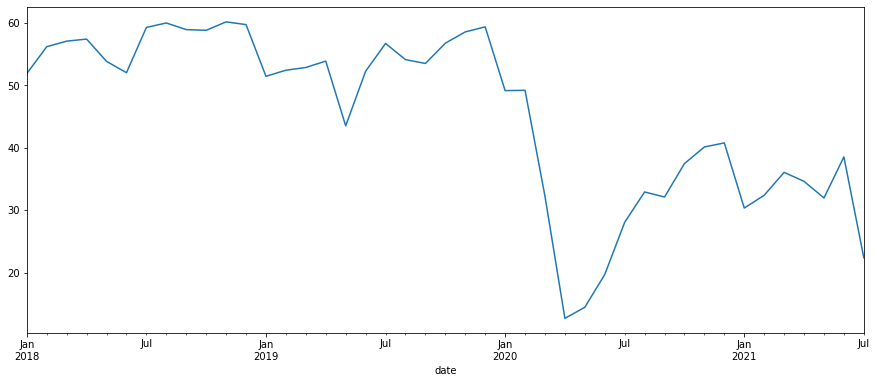

In [88]:
final_df.plot(figsize=(15, 6), legend=False)
plt.show()

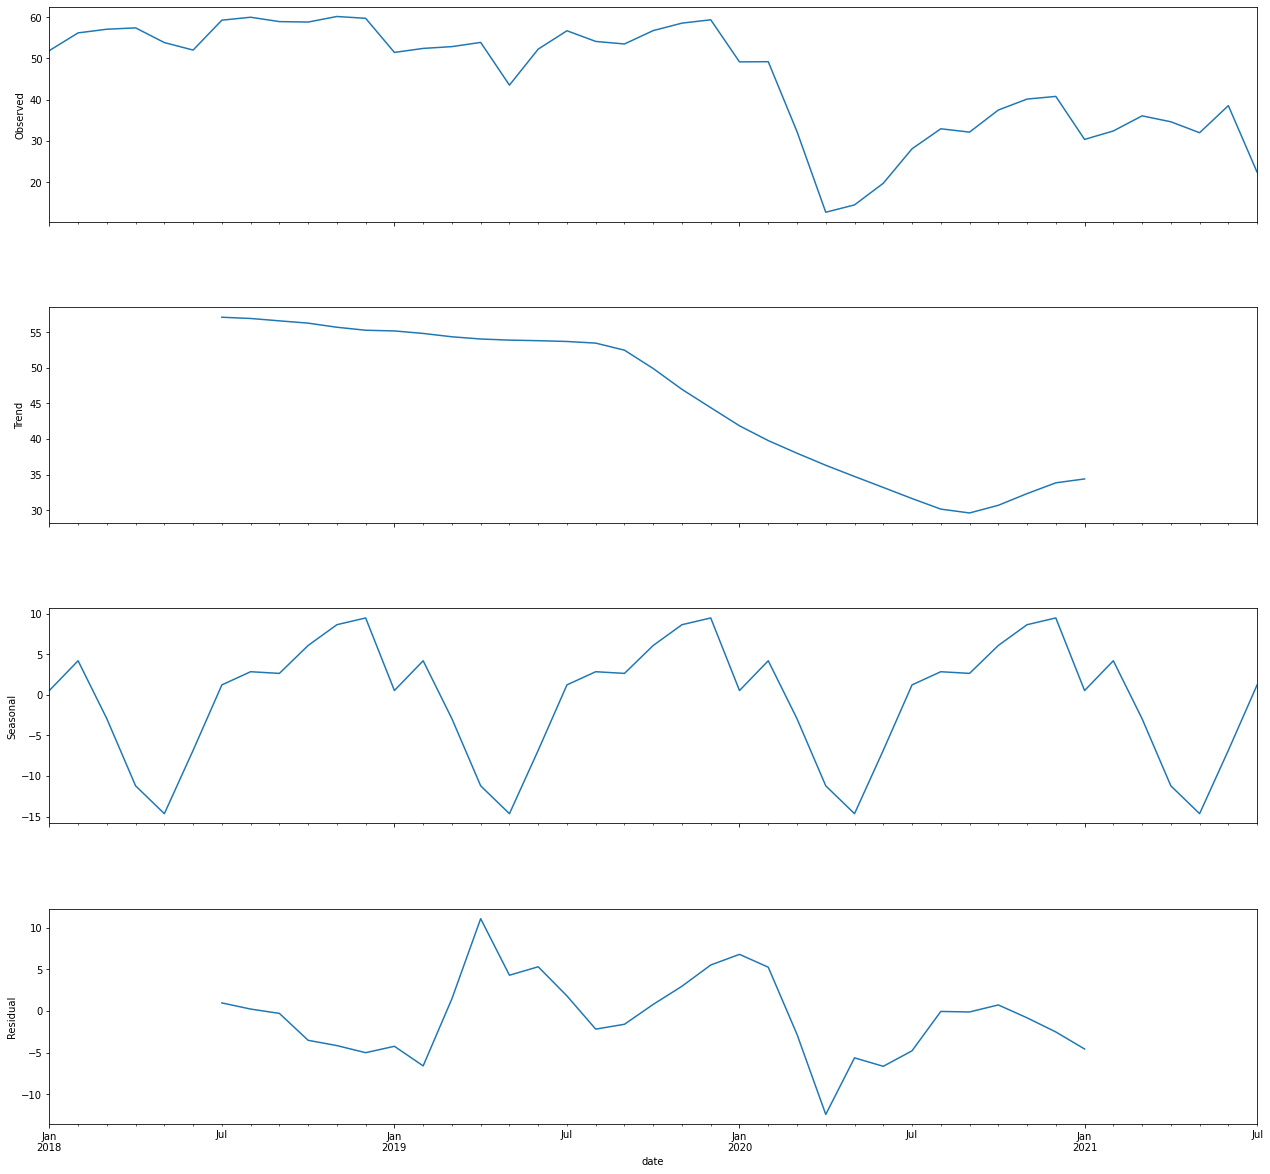

In [95]:
decomposition = sm.tsa.seasonal_decompose(final_df.astype('float64'), model='additive')
fig = decomposition.plot()
fig.set_figwidth(20)
fig.set_figheight(20)
plt.show()